### EDA: Covtype Dataset Insights

#### Dataset Overview
The Covtype dataset contains forest cover type classification data with multiple features describing forest characteristics.

#### Exploring the dataset
1. **DATASET OVERVIEW** - Check shape, basic info, first/last rows, Mean, median, std, min, max, quantiles
2. **DATA TYPES & FEATURE CLASSIFICATION** - Identify numerical vs categorical features
3. **MISSING VALUES** - Check for null/NaN values
4. **OUTLIERS DETECTION (for continuous features)** - Find the upper and lower bound and see how many samples fall outside this distribution
5. **VISUALIZE NUMERICAL FEATURES** - Plot histograms and boxplot for numerical features
6. **CORRELATION ANALYSIS** - Correlation Matrix for all of the numerical features
7. **CLASS DISTRIBUTION** - Check whether the output variable is impalanced

#### Handle the data
8. Fix the higly imbalanced dataset
10. Check whether the output variable is impalanced

### Explore the data


In [33]:
SEED = 42

import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [6]:
data_path = os.path.join("..", "Data", "covtype_train.csv")
df_covtype = pd.read_csv(data_path)

print(df_covtype.shape)
df_covtype.head()

(58101, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,0,0,0,1,0,0,1
1,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,0,0,2
2,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,0,0,2
3,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,2
4,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,2


In [7]:
# 1. Get an overview of the dataset
print(df_covtype.describe())

          Elevation        Aspect         Slope  \
count  58101.000000  58101.000000  58101.000000   
mean    2961.095695    156.183508     14.113045   
std      279.091350    112.026044      7.475782   
min     1871.000000      0.000000      0.000000   
25%     2810.000000     59.000000      9.000000   
50%     2997.000000    127.000000     13.000000   
75%     3165.000000    262.000000     18.000000   
max     3846.000000    360.000000     62.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      58101.000000                    58101.000000   
mean                         269.666649                       46.146831   
std                          212.153471                       57.974062   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       29.000000   
75%            

In [12]:

# 2Identify the binary features 
binary_features = [col for col in df_covtype.columns 
                   if set(df_covtype[col].unique()).issubset({0, 1})]

continuous_features = [
    'Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
    'Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]
target_col = 'Cover_Type'

print("Continuous:", len(continuous_features), "Binary:", len(binary_features))


Continuous: 10 Binary: 44


In [15]:
# 3. Check for missing values
missing_value_rows = df_covtype.isnull().sum()
missing_summary = pd.DataFrame({
    'Missing Count': missing_value_rows,
    'Missing Percentage': 100 * missing_value_rows / len(df_covtype)
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
if missing_summary.empty:
    print("No missing values detected.")
else:
    print(missing_summary)

No missing values detected.


In [30]:
# 4.Check for outliers (for numerical features)

outlier_results = []

for col in continuous_features:
    q1 = df_covtype[col].quantile(0.25)
    q3 = df_covtype[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df_covtype[(df_covtype[col] < lower) | (df_covtype[col] > upper)][col]
    outlier_results.append({
        'feature': col,
        'lower_bound': lower,
        'upper_bound': upper,
        'outlier_count': len(outliers),
        'outlier_percentage': 100 * len(outliers) / len(df_covtype)
    })
# outlier_results
outlier_df = pd.DataFrame(outlier_results)
display(outlier_df)


,feature,lower_bound,upper_bound,outlier_count,outlier_percentage
0,Elevation,2277.5,3697.5,1507,2.593759
1,Aspect,-245.5,566.5,0,0.000000
2,Slope,-4.5,31.5,1543,2.655720
3,Horizontal_Distance_To_Hydrology,-315.0,813.0,1316,2.265021
4,Vertical_Distance_To_Hydrology,-84.5,159.5,3232,5.562727
5,Horizontal_Distance_To_Roadways,-2231.5,6668.5,56,0.096384
6,Hillshade_9am,148.5,280.5,1740,2.994785
7,Hillshade_Noon,177.0,273.0,1523,2.621297
8,Hillshade_3pm,44.0,244.0,713,1.227173
9,Horizontal_Distance_To_Fire_Points,-1271.0,4849.0,3063,5.271854


Outliers will be handled with later in the EDA

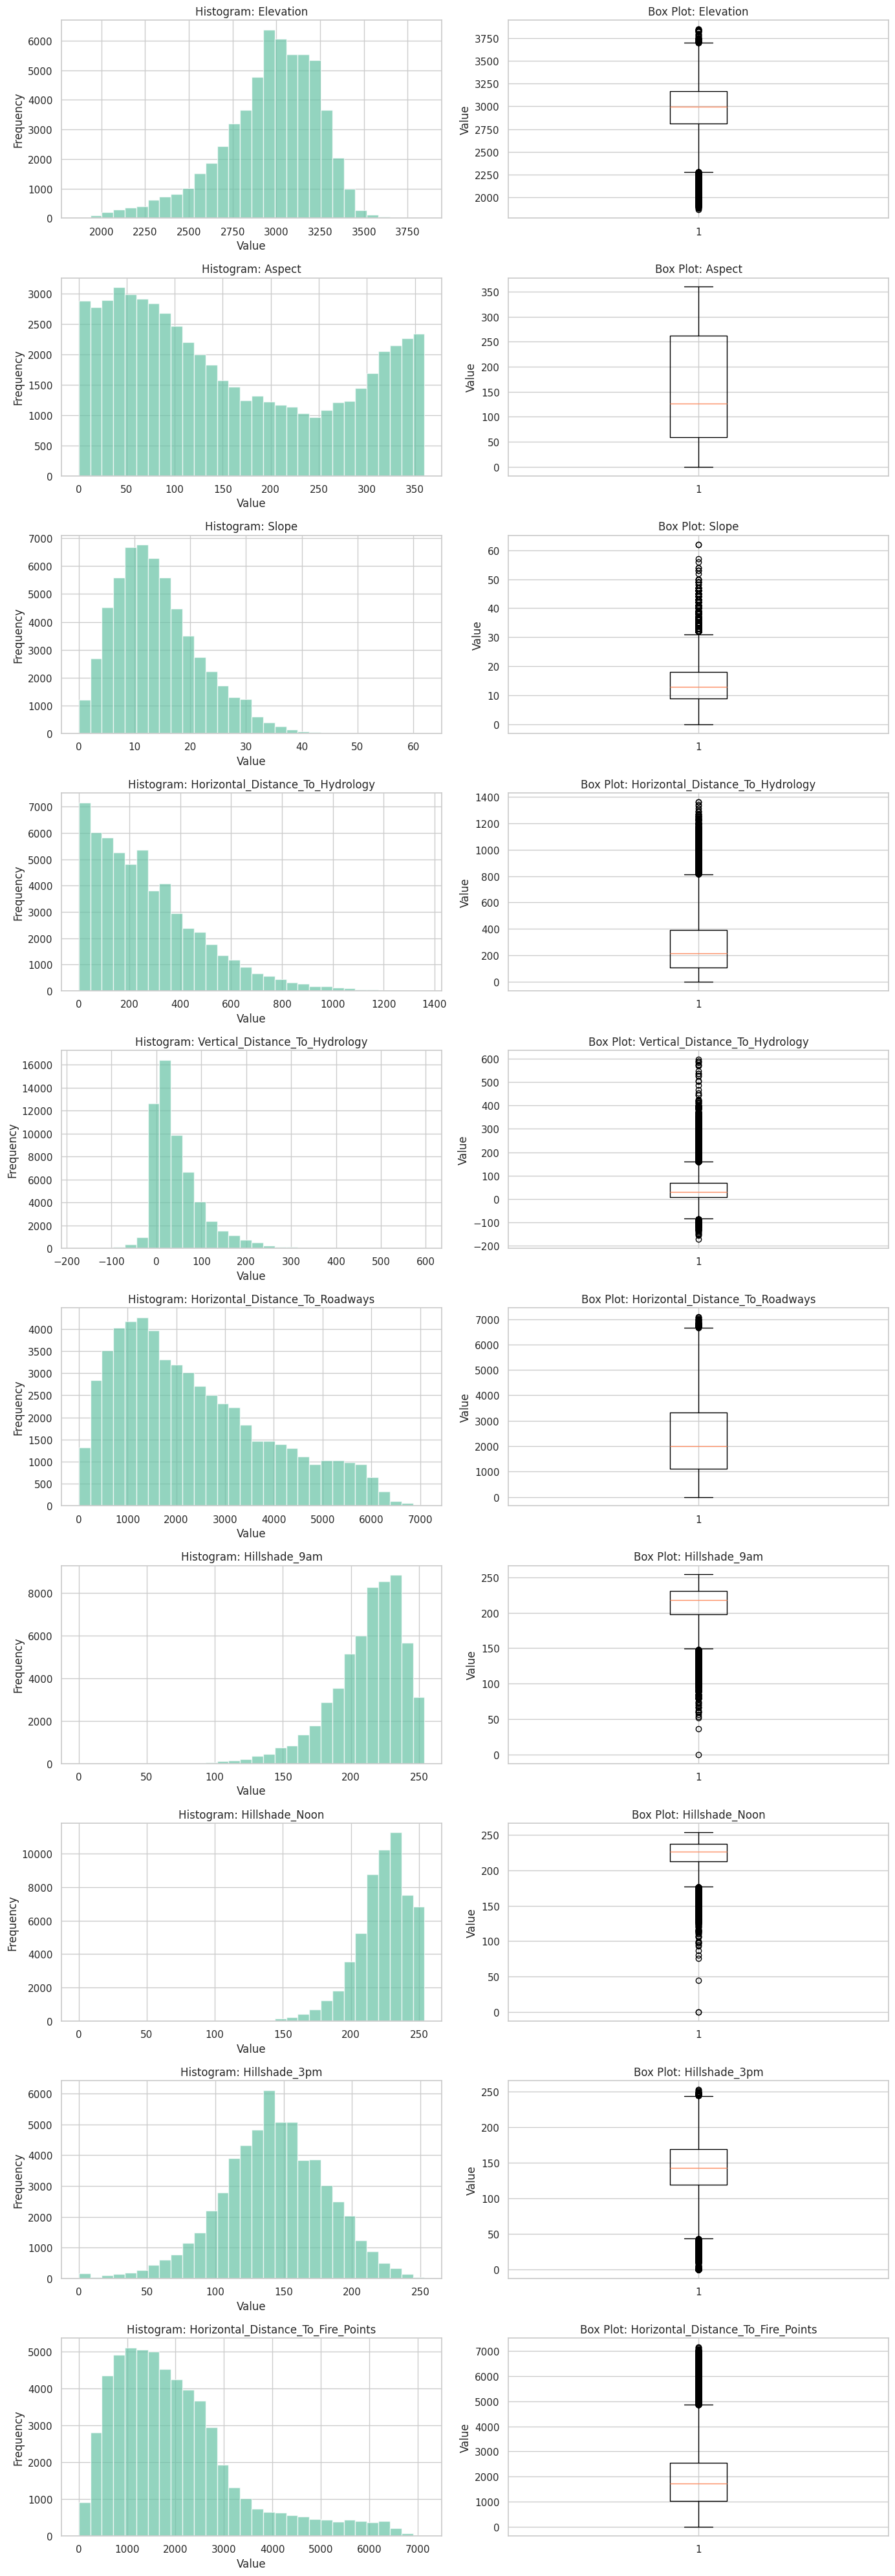

In [38]:
# 5. Plot graphs and visualize
#Only take the numerical features that are continuous
fig, axes = plt.subplots(len(continuous_features), 2, figsize=(14, 4*len(continuous_features)))
    
for idx, col in enumerate(continuous_features):
    axes[idx, 0].hist(df_covtype[col], bins=30, alpha=0.7)
    axes[idx, 0].set_title(f'Histogram: {col}')
    axes[idx, 0].set_xlabel('Value')
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 1].boxplot(df_covtype[col])
    axes[idx, 1].set_title(f'Box Plot: {col}')
    axes[idx, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()

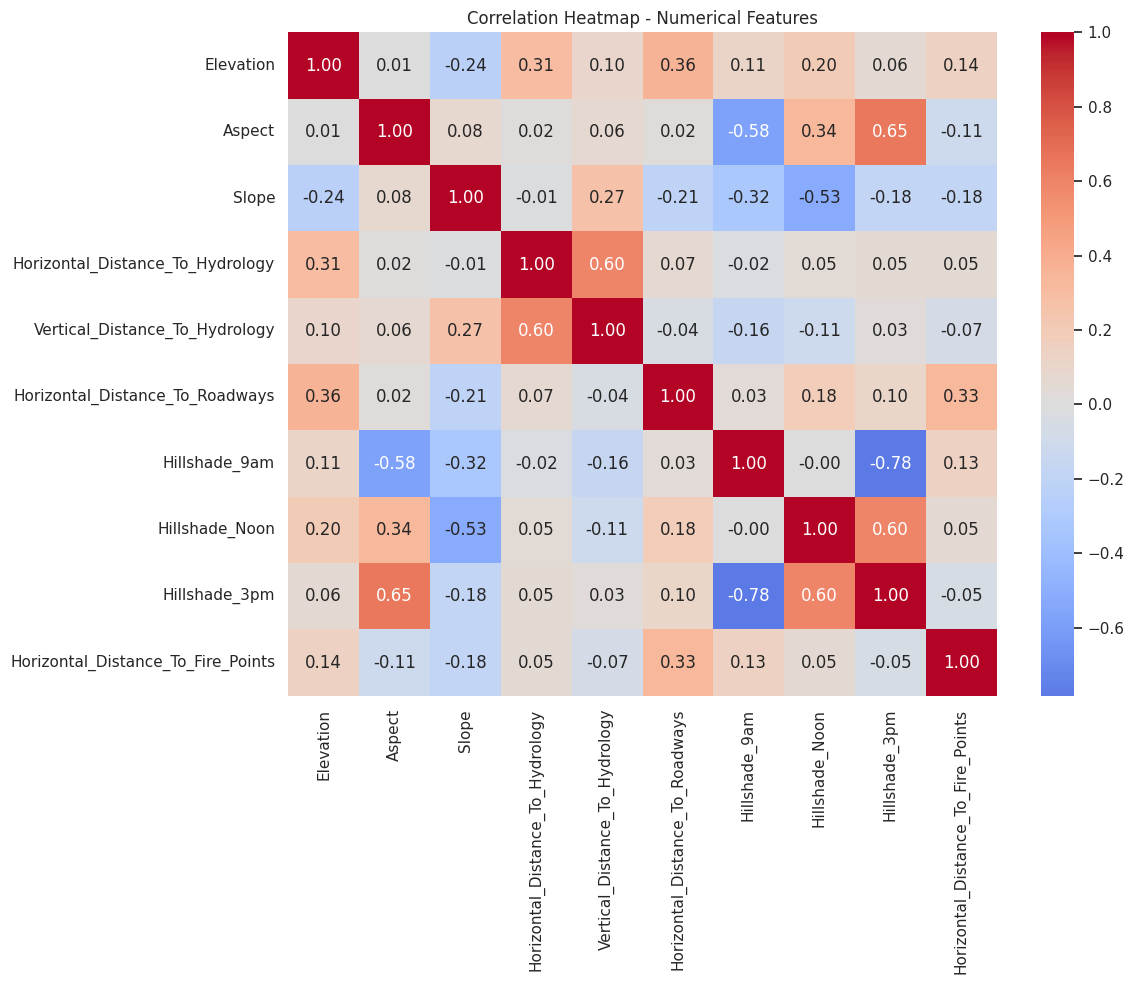

In [27]:
# 6. CORRELATION ANALYSIS
if len(continuous_features) > 1:
    correlation_matrix = df_covtype[continuous_features].corr()

    # correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Heatmap - Numerical Features')
    plt.tight_layout()
    plt.show()


There are no correlated pairs with an  |r| > 0.8, therefore we will not handle the features any further based on the correlation matrix

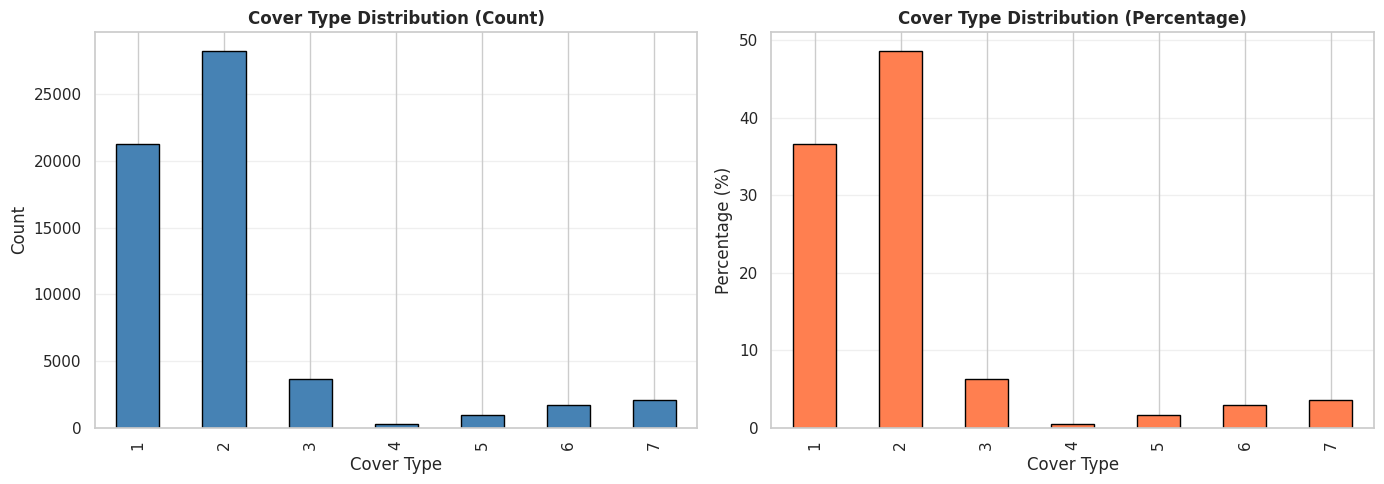

28248
259


In [39]:

# 7. Check for imbalanced dataset
class_counts = df_covtype['Cover_Type'].value_counts().sort_index()
class_percentages = (df_covtype['Cover_Type'].value_counts(normalize=True).sort_index() * 100)
df_distribution = pd.concat([class_counts, class_percentages], axis=1)

df_distribution

# # Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

df_distribution['count'].plot(kind='bar', ax=ax1, edgecolor='black', color='steelblue')
ax1.set_title('Cover Type Distribution (Count)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Count')
ax1.grid(axis='y', alpha=0.3)

df_distribution['proportion'].plot(kind='bar', ax=ax2, edgecolor='black', color='coral')
ax2.set_title('Cover Type Distribution (Percentage)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Cover Type')
ax2.set_ylabel('Percentage (%)')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

max_class_count = class_counts.max()
print(max_class_count)
min_class_count = class_counts.min()
print(min_class_count)

Dataset is very imbalanced, need to be handles later

### Handle the data

Handling the class imbalance 

In [ ]:
# Train/Test Split (BEFORE resampling to maintain realistic evaluation)

# SMOTE
original_total = len(y)
max_class = class_counts.max()
target_ratio = 0.6

smote_strategy = {
    cls: int(max_class * target_ratio)
    for cls in y.unique()
    if (y == cls).sum() < max_class * target_ratio
}
X_approach = X.copy()
y_approach = y.copy()

smote = SMOTE(sampling_strategy=smote_strategy, random_state=42, k_neighbors=5)
X_approach, y_approach = smote.fit_resample(X_approach, y_approach)


Train set: 46480
Test set size: 11621


In [16]:
X_resampled_final = X_approach.copy()
y_resampled_final = y_approach.copy()

df_covtype_final = X_resampled_final.copy()
df_covtype_final['Cover_Type'] = y_resampled_final.values

print(f"Combined dataset shape: {df_covtype_final.shape}")
print(f"Class distribution:\n{df_covtype_final['Cover_Type'].value_counts().sort_index()}")

max_count = y_approach.value_counts().max()

max_class = y_approach.value_counts().idxmax() 
target_majority = int(max_count * 0.85)

undersample_strategy = {
    max_class: target_majority
}

undersample = RandomUnderSampler(
    sampling_strategy=undersample_strategy,
    random_state=42
)

X_approach, y_approach = undersample.fit_resample(X_approach, y_approach)

X_resampled_final = X_approach.copy()
y_resampled_final = y_approach.copy()
print("\n")
print(y_resampled_final.value_counts().sort_index())
print(max_class, max_count)

Combined dataset shape: (134285, 55)
Class distribution:
Cover_Type
1    21297
2    28248
3    16948
4    16948
5    16948
6    16948
7    16948
Name: count, dtype: int64


Cover_Type
1    21297
2    24010
3    16948
4    16948
5    16948
6    16948
7    16948
Name: count, dtype: int64
2 28248


In [ ]:
# Improved Cell 8: Train/test split before imbalance checks
test_size = 0.2
X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, stratify=y
)

train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

display(pd.DataFrame({
    'train_count': train_counts,
    'train_pct': (train_counts / len(y_train) * 100).round(3),
    'test_count': test_counts,
    'test_pct': (test_counts / len(y_test) * 100).round(3)
}))


In [ ]:
# Improved Cell 9: Binary validation (bug fix)
non_binary = []
for col in binary_features:
    vals = set(df[col].unique())
    if not vals.issubset({0, 1}):
        non_binary.append((col, vals))

if non_binary:
    print("Non-binary columns detected:", non_binary)
    raise ValueError("Expected strictly binary one-hot columns")
else:
    print("All one-hot columns are binary.")


In [ ]:
# Improved Cell 11: Sample plots comparing scaling choices
sample_cols = continuous_features[:3]
fig, axes = plt.subplots(len(sample_cols), 3, figsize=(14, 3*len(sample_cols)))
for i, col in enumerate(sample_cols):
    axes[i, 0].hist(X_train[col], bins=40, color='steelblue', edgecolor='black')
    axes[i, 0].set_title(f'Original: {col}')
    axes[i, 1].hist(X_train_std[col], bins=40, color='coral', edgecolor='black')
    axes[i, 1].set_title('Standardized')
    axes[i, 2].hist(scaled['minmax']['X_train'][col], bins=40, color='lightgreen', edgecolor='black')
    axes[i, 2].set_title('MinMax')
plt.tight_layout()
plt.show()


In [ ]:
# Improved Cell 12: Class weights (baseline for imbalance)
classes = np.sort(y_train.unique())
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = {cls: w for cls, w in zip(classes, class_weights)}
class_weight_dict


In [ ]:
# Improved Cell 13: SMOTENC on train only (handles one-hot binaries)
# Identify categorical (binary) feature indices for SMOTENC
total_features = continuous_features + binary_features
binary_indices = [total_features.index(c) for c in binary_features]

smotenc = SMOTENC(
    categorical_features=binary_indices,
    sampling_strategy='auto',
    random_state=42,
    k_neighbors=5
)

X_train_enc, y_train_enc = smotenc.fit_resample(X_train_std[total_features], y_train)
print("Original train size:", X_train_std.shape, "After SMOTENC:", X_train_enc.shape)
print(y_train_enc.value_counts().sort_index())
